# Can You Predict An Anime's Score?

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Names

- Tony Bai
- Ryan Regala
- Jiwon Kim
- Colin Isidro
- Rambharath Saravanan

# Abstract

The purpose of this project is to see if an anime's score can be predicted before it comes out by utilizing its genres, episode count, studio that is adapting it, platform it will be streamed on, and the source material it is adapted from. In addition, we also hope to find anime genres that have been adapted less so it can get its spotlight among the more popular genres, like sci-fi, fantasy, action, etc.. Unfortunately, due how our data is stored and high multicolinearity between features, we are unable to have a meaningful and usable model for predicting an anime's score

# Research Question

Based on an anime's genre(s), number of episodes, studio(s) that animated it, platform(s) it is being streamed on, and its source material (manga, light novel, visual novel, etc.), can we predict its score on MyAnimeList, a platform that gives an anime a score by aggregating scores given by its users from 1-10

## Background and Prior Work

For our project, we want to look at multiple different qualities in anime and see if we can use that to predict the score of an anime on MyAnimeList. From our research, we know that MyAnimeList has the biggest data on anime with having the least amount of missing data. The same source mentions that there were no strict web scraping policies as of early 2024, but further research suggests the scraping the website wouldn't be allowed, yet we would be allowed to get data from their API that has similar data if we wanted. We also know a lot about how MyAnimeList calculates its weighted average anime scores from the previous projects. <a name="ref-2"></a>[<sup>2</sup>](#ref-2) On top of that, we also found out that using a non-linear regression model would be more accurate than a linear one since their scores are also calculated on a non-linear formula.<a name="ref-1"></a>[<sup>1</sup>](#ref-1)

Another project suggests that multimodal data decreases the error in prediction models for MyAnimeList scores. <a name="ref-2"></a>[<sup>2</sup>](#ref-2) So, our project could put that into consideration as well as the genre, episodes, liscensing platforms, and source material previously mentioned in the research question. A project also puts forth a good practice of checking the collinearity of the variables we are checking for.<a name="ref-1"></a>[<sup>1</sup>](#ref-1)

## Metis Project 2: Prediction Model on Anime Rating Score
In this project, the author tries to make a prediction model based on MyAnimeList scores. They first scraped the data from that website, created a collinearity heat map to remove highly collinear features. They then used multiple linear regression models and finalized with using the one that had the least amount of error (Polynomial). They found that anime based off manga, added as Favorite on MAL, and produced by Production I.G. showed a correlation with popular anime rating scores. Though, they also specified that MAL specifies that their anime scores are calculated on a non-linear formula while this prediction model was more linear. 

1. <a name="ref1"></a> [^](#ref-1)Ting, K. S. (2021, December 16). Metis Project 2: Prediction Model on Anime Rating Score. Medium. https://medium.com/@sitingkoh1808/metis-project-2-prediction-model-on-anime-rating-score-65d9b5e3a6

## Anime Popularity Prediction Before Huge Investments: a Multimodal Approach Using Deep Learning
This project aims to predict the popularity of an anime (based off of MAL scores) using multimodal text-image data. They used a 3 input deep neural network with the input of synopsis, main character descriptions, and main character portraits. They found that their model best worked with the multimodal data in their prediction of MAL ratings. Though, they say that the model could be improved with more RAM allocated to the analysis, allowing images to be encoded into more tokens.

2. <a name="ref2"></a> [^](#ref-2) Armenta-Segura, J., & Sidorov, G. (2024). Anime Popularity Prediction Before Huge Investments: a Multimodal Approach Using Deep Learning. arXiv preprint arXiv:2406.16961.

# Hypothesis


Our hypothesis is that the more popular genres, more well known animation studios, and more well known streaming platforms will be strongly positively correlated with a higher score compared to less popular genres, animation studios, and streaming platforms; an anime's episode count will be positively correlated with its score; and the source material of an anime will have no correlation with its score. 

More popular genres, well known animation studios and streaming platforms, by virtue of being more popular well known, will have higher scores because they already have a fanbase that will inevitably be biased and think more highly of them. We think an anime's episode count will be positively correlated with its score because most of the highest rated animes on MyAnimeList have more episodes than the average episode count nowadays, which is 12. We think an anime's source material will have no correlation with its score because we think all the source materials have similar amounts of good and bad adaptations.

# Data

## Data overview

- Dataset #1
  - Dataset Name: Anime Dataset 2023
  - Link to the dataset: https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset/data
  - Number of observations: 24905
  - Number of variables: 24

In Anime Dataset 2023, we have data on animes as recent as September 2022 (Summer 2022 season) and as far back as 1900s. There are a total of 24 columns in this dataset but the ones we care about are name, score, genres, episodes, studio, source, and licensors. 

Name contains the English pronouciation of names of every anime, score contains the aggregated score from each user that rated the animes, genres contains the genres for each anime (often multiple genres for each anime), studio contains the name of the animating studio(s) that did the work of adapting the show into anime (e.g. Bones, Madhouse, Toei Animations, etc.), source contains the source material that each anime was adapted from (anime original, manga, light novel, etc.), and licensors contains the platform(s) the anime was streamed on (e.g. Crunchyroll, Funimation, Bandai Entertainment, etc.). 

The first step of cleaning would be filter out all the animes in the dataset that doesn't have "TV" in the Type column since we want to only focus on animes that are aired as TV shows, having other types within our model (movies, OVAs ONAs, etc.) could skew our results since those are a different medium. In addition, there are a lot of missing data (marked as UNKNOWN) in the dataset which we can fill in ourselves using MyAnimeList's API, and if there are any UNKNOWN data after that we can remove because those data doesn't exist, the most common explanations would be either the anime is still airing (unknown episode count) or no one has ever scored the anime (unknown aggregate score).

## Anime Dataset 2023

import packages for use

In [1]:
import pandas as pd
import requests
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

create functions to scrape off APIs of 2 websites with information on animes, MyAnimeList, and AniList

In [ ]:
def scoreScraping(subset : pd.DataFrame):
    '''For reading in MyAnimeList scores using its API'''
    url = "https://api.myanimelist.net/v2/anime/"
    clientHeader = {'X-MAL-CLIENT-ID':'be63c0a5e8517ce10df18a744cbf9045'}
    for i in range(subset.shape[0]):
        row = subset.iloc[i]

        if row.get('Score') == 'UNKNOWN': # if score is missing
            anime_id = row.get('anime_id')
            index = row.name

            response = requests.get(url + str(anime_id) + '?fields=mean', headers=clientHeader)
            if response.status_code == 200: # if response is returned successfully
                json = response.json()
                if 'mean' in json: # if a score was read in
                    subset.loc[index, 'Score'] = json['mean']

    return subset

In [ ]:
def aniListScraping(dataset : pd.DataFrame):
    '''For reading in genres, episode count, studios, streaming website, and source off AniList API'''
    url = 'https://graphql.anilist.co'
    query = '''
    query ($idMal: Int!) { # Define which variables will be used in the query (id)
        Media (idMal: $idMal, type: ANIME) { # Insert our variables into the query arguments (id) (type: ANIME is hard-coded in the query)
            genres
            episodes
            studios{
                nodes{
                    name
                    isAnimationStudio
                }
            }   
            streamingEpisodes{
                site
            }
            source
        }
    }
    '''
    # get the subset of missing data and get the index of subset
    subset = dataset[(dataset.get('Genres') == 'UNKNOWN') | (dataset.get('Episodes') == 'UNKNOWN') | (dataset.get('Studios') == 'UNKNOWN') 
                     | (dataset.get('Licensors') == 'UNKNOWN') | (dataset.get('Source') == 'Unknown')]
    indicies = subset.index

    for index in indicies:
        entry = dataset.loc[index]
        variables = {'idMal': entry.get('anime_id').item()}
        response = requests.post(url, json={'query': query, 'variables': variables})

        if response.status_code == 429: # if ratelimit was reached
            time.sleep(61)
            response = requests.post(url, json={'query': query, 'variables': variables})

        if response.status_code == 200: # if reponse is returned successfully
            data = response.json()['data']['Media']

            if entry.get('Genres') == 'UNKNOWN' and 'genres' in data:
                dataset.loc[index, 'Genres'] = ','.join(data['genres'])
            if entry.get('Episodes') == 'UNKNOWN' and 'episodes' in data:
                dataset.loc[index, 'Episodes'] = data['episodes']
            if entry.get('Studios') == 'UNKNOWN' and 'studios' in data:
                studios = data['studios']['nodes']
                cellEntry = []
                for studio in studios:
                    if studio['isAnimationStudio']:
                        cellEntry.append(studio['name'])
                dataset.loc[index, 'Studios'] = ','.join(cellEntry)
            if entry.get('Licensors') == 'UNKNOWN' and 'streamingEpisodes' in data:
                if len(data['streamingEpisodes']) != 0:
                    dataset.loc[index, 'Licensors'] = data['streamingEpisodes'][0]['site']
            if entry.get('Source') == 'Unknown' and 'source' in data:
                dataset.loc[index, 'Source'] = data['source']


First, let's import our dataset and filter out the columns that we currently need for data wrangling. 

In [ ]:
# import initial dataset
dataset = pd.read_csv('anime-dataset-2023.csv')
dataset = dataset[dataset.get('Type') == 'TV'].get(['anime_id', 'Name', 'Score', 'Genres', 'Episodes', 'Studios', 'Licensors', 'Source'])

Now, let's scrape missing data off of MyAnimeList using its API. Because MyAnimeList's API forces a cooldown if it is accessed too many times in a short amount of time, we are forced to wait 5 minutes between each chunk of API requests

In [ ]:
ranges = np.arange(500, 7597, 500)
ranges = np.append(ranges, 7597)

print(f'Starting chunk 0')
dataset[ranges[0]+1:ranges[0+1]] = scoreScraping(dataset[ranges[0]+1:ranges[0+1]])
print(f'Finished chunk 0')
for i in range(len(ranges) - 1):
    print(f'Starting chunk {ranges[i]}')
    dataset[ranges[i]+1:ranges[i+1]] = scoreScraping(dataset[ranges[i]+1:ranges[i+1]])
    print(f'Finished chunk {ranges[i]}')
    print('Starting 5 min cooldown')
    time.sleep(300)


Because this one single cell took more than 1 hour, I will save the edited dataset as 'edited-anime-dataset.csv' then reimport so we won't have to spend that much time again

In [ ]:
dataset.to_csv('edited-anime-dataset.csv', index=False)

In [ ]:
# import edited dataset
editedset = pd.read_csv('edited-anime-dataset.csv')
# check how many unknown scores we have now
editedset[editedset.get('Score') == 'UNKNOWN'].shape

(2807, 8)

Although we have run our function to call the MAL API to try and get the score, many of them still has that cell empty because no one has ever scored them on MyAnimeList. Since an anime's score is crucial in our model, we will remove the ones that have it missing because they are unhelpful for our analysis

In [ ]:
editedset = editedset[dataset.get('Score') != 'UNKNOWN']
editedset[editedset.get('Score') == 'UNKNOWN'].shape

(0, 8)

We will now use AniList's API to get any missing data in Genres, Episodes, Studios, Licensors, and Source since AniList's API is more sophisticated compared to MyAnimeList's API. It also allows us to get Licensors, a piece of information that we cannot get off of MyAnimeList's API

In [ ]:
aniListScraping(editedset)

This one function call also took more than an hour because AniList's API has a rate limit of 30 calls per minute, and if it is reached we get put on a 1 minute cooldown, so for timesaving we will also save and reimport this final dataset. After this we are free from getting information from APIs

In [ ]:
editedset.to_csv('final-anime-dataset.csv', index=False)

In [ ]:
finalset = pd.read_csv('final-anime-dataset.csv')

In [ ]:
print(finalset[(finalset.get('Genres') == 'UNKNOWN') | (finalset.get('Episodes') == 'UNKNOWN') | (finalset.get('Studios') == 'UNKNOWN') | 
                     (finalset.get('Licensors') == 'UNKNOWN')].shape)
print(finalset[(finalset.get('Licensors') == 'UNKNOWN')].shape)
finalset[(finalset.get('Licensors') == 'UNKNOWN')].head()

(1732, 8)
(1732, 8)


,anime_id,Name,Score,Genres,Episodes,Studios,Licensors,Source
6,17,Hungry Heart: Wild Striker,7.55,"Comedy, Slice of Life, Sports",52.0,Nippon Animation,UNKNOWN,Manga
12,23,Ring ni Kakero 1,6.39,"Action, Sports",12.0,Toei Animation,UNKNOWN,Manga
33,62,D.C.: Da Capo,6.72,"Drama, Romance",26.0,"feel., Zexcs",UNKNOWN,Visual novel
64,102,Aishiteruze Baby★★,7.44,"Comedy, Drama, Romance",26.0,TMS Entertainment,UNKNOWN,Manga
65,103,Akazukin Chacha,7.49,"Adventure, Comedy, Fantasy, Romance",74.0,Gallop,UNKNOWN,Manga


after scraping information off AniList's API we still have a lot of unknown information, all of them having at least the Licensors column missing, most likely because they were aired on TV before anime streaming platforms, like Crunchyroll, were a thing so these animes aren't on any streaming platforms. We are free to remove these animes since they are unhelpful for our analysis

In [ ]:
finalset = finalset[(finalset.get('Licensors') != 'UNKNOWN')]
finalset.shape

(3058, 8)

In [ ]:
print(finalset.isnull().sum(axis=0))

anime_id      0
Name          0
Score         0
Genres        4
Episodes      7
Studios      16
Licensors     0
Source        0
dtype: int64


Let's also look at why we have these nulls in the rest of the columns

In [ ]:
finalset[finalset.get('Genres').isnull()]

,anime_id,Name,Score,Genres,Episodes,Studios,Licensors,Source
1968,8753,Ultraman Kids: Haha wo Tazunete 3000-man Kounen,6.09,NaN,26.0,NaN,Mill Creek Entertainment,Other
2399,15547,Cross Fight B-Daman eS,6.45,NaN,52.0,SynergySP,ADK Emotions NY,Unknown
2685,21835,Majin Bone,6.62,NaN,52.0,Toei Animation,Crunchyroll,Game
2731,22735,Oreca Battle,5.86,NaN,51.0,"Xebec, OLM",Crunchyroll,Game


searching for these animes on AniList, they simply have no genres listed, one reason as to why might be because they are all children's shows. Since we want genres in our analysis, we will drop these animes because they are unhelpful for our prediction

In [ ]:
finalset[finalset.get('Episodes').isnull()]

,anime_id,Name,Score,Genres,Episodes,Studios,Licensors,Source
10,21,One Piece,8.69,"Action, Adventure, Fantasy",NaN,Toei Animation,"Funimation, 4Kids Entertainment",Manga
159,235,Detective Conan,8.17,"Adventure, Comedy, Mystery",NaN,TMS Entertainment,"Funimation, Crunchyroll",Manga
522,966,Crayon Shin-chan,7.77,"Comedy, Ecchi",NaN,Shin-Ei Animation,Funimation,Manga
1488,4459,Ojarumaru,6.32,"Adventure, Award Winning, Comedy, Fantasy",NaN,Gallop,Enoki Films,Original
1732,6149,Chibi Maruko-chan (1995),7.27,"Comedy, Slice of Life",NaN,Nippon Animation,Crunchyroll,Manga
3172,32353,Bonobono (TV 2016),6.33,"Comedy, Slice of Life",NaN,Eiken,Crunchyroll,4-koma manga
4451,50250,Chiikawa,5.68,Comedy,NaN,Doga Kobo,Sentai Filmworks,Web manga


these animes with no episode count are still airing, so it makes sense that they don't have a concrete episode count. Since we want episode counts in our analysis, we will need to drop these animes

In [ ]:
finalset[finalset.get('Studios').isnull()].head()

,anime_id,Name,Score,Genres,Episodes,Studios,Licensors,Source
1223,3202,Daisuki! Hello Kitty,6.27,Fantasy,26.0,NaN,ADV Films,Original
1298,3519,Garakuta-doori no Stain,6.37,"Award Winning, Comedy",13.0,NaN,Funimation,Unknown
1394,3880,Makyou Densetsu Acrobunch,5.90,Sci-Fi,24.0,NaN,Discotek Media,Original
1416,4025,Asobou! Hello Kitty,5.88,"Adventure, Fantasy",26.0,NaN,ADV Films,Unknown
1467,4244,Ginga Shippuu Sasuraiger,6.40,"Action, Adventure",43.0,NaN,Discotek Media,Original


searching for these animes on AniList, they either have no studios listed, or only have producers instead of the traditional animation studios we want for analysis. We are free to drop these animes as well. Now we are left with a little over 3 thousand usable entries in our dataset

In [ ]:
finalset = finalset.dropna()
finalset.shape

(3032, 8)

# Results

## Exploratory Data Analysis

### Our Data from a Glance

In [2]:
#Get the dataset from previous section
main_df = pd.read_csv('final-anime-dataset.csv')
main_df = main_df[main_df.get('Licensors') != 'UNKNOWN']
main_df = main_df.dropna()

main_df.describe()

,anime_id,Score,Episodes
count,3032.000000,3032.000000,3032.000000
mean,22227.401715,7.027315,21.812005
std,17818.568263,0.791123,27.459546
min,1.000000,2.900000,3.000000
25%,2926.750000,6.530000,12.000000
50%,22146.000000,7.070000,13.000000
75%,37447.750000,7.540000,24.000000
max,55717.000000,9.310000,500.000000


In [ ]:
main_df['Genres'].value_counts()

Genres
Comedy                                                 171
Comedy, Slice of Life                                  108
Action, Sci-Fi                                         101
Comedy, Romance                                         92
Action, Adventure, Fantasy                              90
                                                      ... 
Adventure, Drama                                         1
Adventure, Drama, Fantasy, Romance, Supernatural         1
Comedy, Drama, Romance, Slice of Life, Supernatural      1
Adventure, Comedy, Fantasy, Mystery, Sci-Fi              1
Action,Supernatural                                      1
Name: count, Length: 527, dtype: int64

In [ ]:
main_df['Studios'].value_counts()

Studios
J.C.Staff                      134
Studio Deen                    117
Sunrise                        110
Madhouse                       107
A-1 Pictures                    85
                              ... 
Project No.9, Tri-Slash          1
A-1 Pictures, Bridge             1
Daewon Media                     1
Tatsunoko Production, Ordet      1
Studio DEEN,Marvy Jack           1
Name: count, Length: 476, dtype: int64

In [ ]:
main_df['Licensors'].value_counts()

Licensors
Crunchyroll                                        744
Funimation                                         600
Sentai Filmworks                                   509
Aniplex of America                                 126
Discotek Media                                     125
                                                  ... 
ADV Films, Discotek Media, Shout! Factory            1
Flatiron Film Company, Geneon Entertainment USA      1
ADV Films, AnimEigo                                  1
Maiden Japan, Geneon Entertainment USA               1
Funimation, Travel Compass                           1
Name: count, Length: 171, dtype: int64

In [ ]:
main_df['Source'].value_counts()

Source
Manga           1124
Original         637
Light novel      423
Game             195
Visual novel     136
Web manga        120
4-koma manga     119
Novel             72
Other             63
Mixed media       47
Unknown           46
Card game         26
Music             12
Book               9
Radio              2
Picture book       1
Name: count, dtype: int64

In [ ]:
print('MEAN OF COUNTS:')
print('Genres: ' + str(main_df['Genres'].value_counts().mean()))
print('Studios: ' + str(main_df['Studios'].value_counts().mean()))
print('Licensors: ' + str(main_df['Licensors'].value_counts().mean()))
print('Source: ' + str(main_df['Source'].value_counts().mean()))
print('\n')

print('RANGE OF COUNTS:')
print('Genres: ' + str(main_df['Genres'].value_counts().max() - main_df['Genres'].value_counts().min()))
print('Studios: ' + str(main_df['Studios'].value_counts().max() - main_df['Studios'].value_counts().min()))
print('Licensors: ' + str(main_df['Licensors'].value_counts().max() - main_df['Licensors'].value_counts().min()))
print('Source: ' + str(main_df['Source'].value_counts().max() - main_df['Source'].value_counts().min()))

MEAN OF COUNTS:
Genres: 5.753320683111954
Studios: 6.369747899159663
Licensors: 17.730994152046783
Source: 189.5


RANGE OF COUNTS:
Genres: 170
Studios: 133
Licensors: 743
Source: 1123


### Our Data in Relation to MAL Score

Here we look at how our predictors look when graphed in relation to the MyAnimeList score.

Text(0.5, 1.0, 'Anime Source Influence on Rating Score')

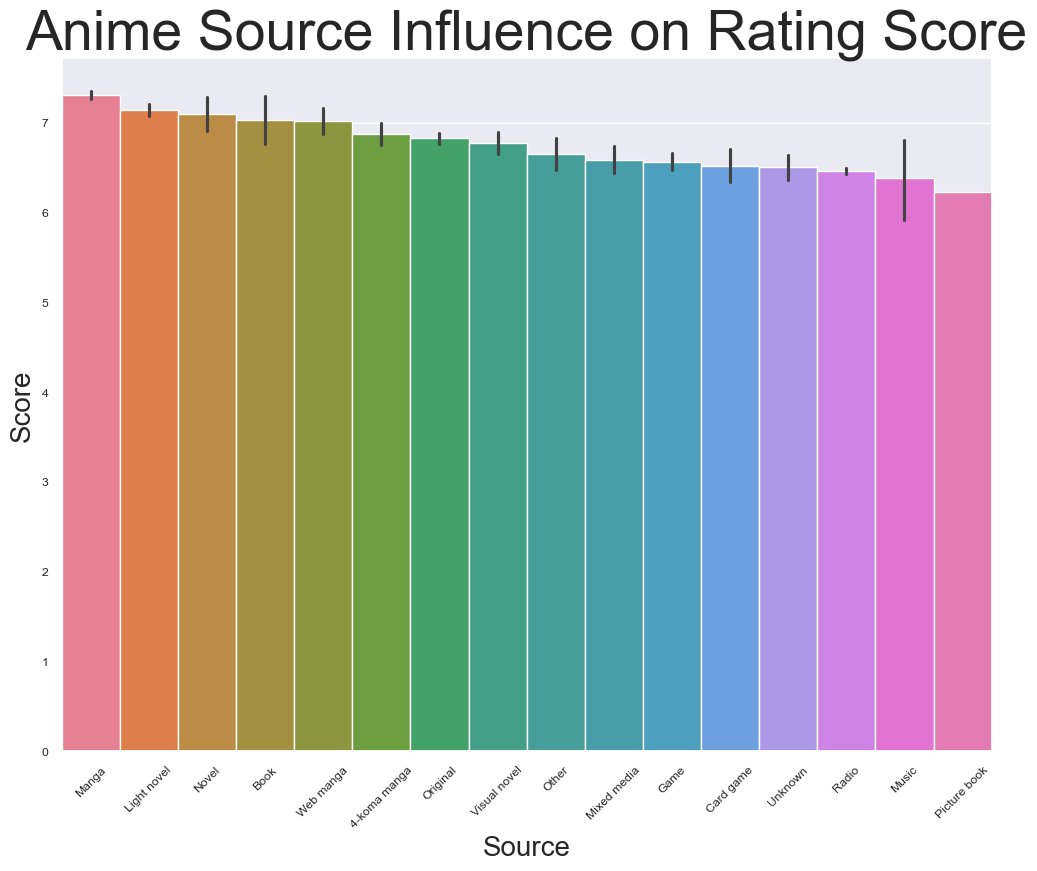

In [135]:
#Group for Source predictor and sort by mean
grouped = main_df.groupby(['Source'])
grouped_df = pd.DataFrame({col:vals['Score'] for col, vals in grouped})
means = grouped_df.mean()
means.sort_values(ascending = False, inplace = True)
sorted_df = grouped_df[means.index]

#Create and customize boxplot
sns.set_theme(rc={'figure.figsize':(12, 9)}, font_scale = 0.8)
plt.xticks(rotation=45)
plt.xlabel('Source', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
sns.barplot(data = sorted_df, width = 1).set_title('Anime Source Influence on Rating Score', fontsize = 40)

This barchart analyzes the relationship between anime sources and their respective review scores on MyAnimeList.com. The anime data set is loaded from a CSV file into a Pandas Dataframe then categorized by their origin (manga, light novels, original works) in the source column. Each barchart generated with Seaborn and Matplotlib represents a different source for anime and includes the mean rating for each source indicated by the error bars indicating variability. Web Novels and Manga have higher mean scores while Music and Picture Books have lower median scores with more variability.  The barchart graph also checks for multicollinearity among predictors using the variance inflation factor (VIF) analysis which converts dummy variables for categorical source columns into numbers to do regression analysis and drops the first category in each column. With the information from the barchart graph, it is possible to carefully infer that a pre-existing fanbase for popular anime sources (manga, light novels) may positively influence scores due to bias, although further analysis is necessary due to the presence of outliers in virtually every category which may suggest that some may perform poorly regardless of source due to other factors that may include execution differences. Further investigation may be necessary to investigate how adaptation quality and execution could be another factor in anime ratings. This insight aligns with our research question on whether an anime's source material, along with other factors like genre, number of episodes, studio, and streaming platform, can help predict its MyAnimeList score. The chart hints at a potential correlation, where adaptations from established sources (e.g., manga and light novels) may benefit from an existing fanbase, potentially leading to higher scores. However, further analysis incorporating multiple predictors is necessary to build a reliable rating prediction model.

In [9]:
#filter our data to only have a main studio for every anime
def separateStudios(df :pd.DataFrame):
    returnList = []
    for row in df.itertuples(index=False):
        studios = row.Studios.split(',')
        for studio in studios:
            row_list = list(row)
            row_list.append(studio.strip())
            returnList.extend([row_list])
    
    return pd.DataFrame(returnList, columns=['anime_id','Name','Score','Genres','Episodes','Studios','Licensors','Source', 'single_studio'])



Text(0.5, 1.0, 'Anime Studio Influence on Rating Score')

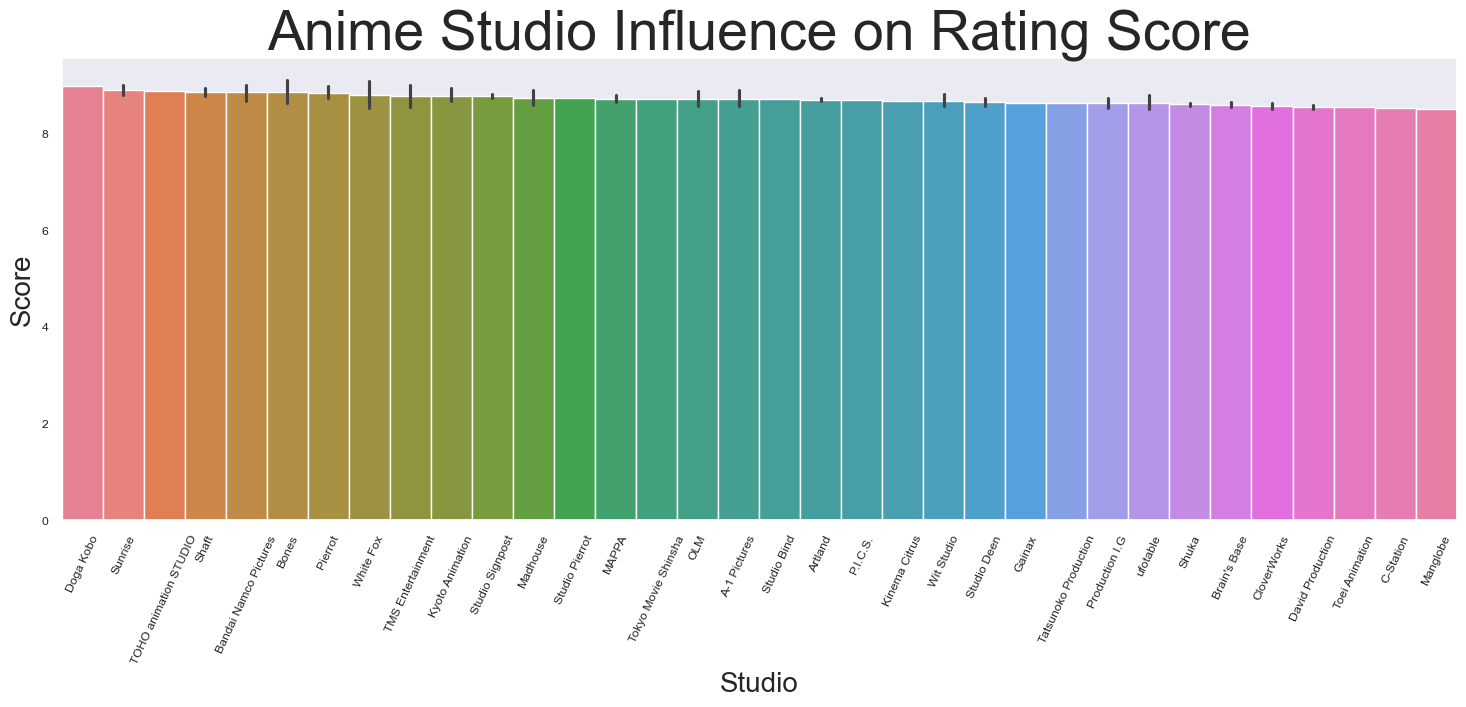

In [136]:
#Graph our new data

#Sort by mean score value
dfSingleStudios = separateStudios(main_df.fillna(''))

# filter to get the animes that have at least a rating of 8.5
dfSingleStudios = dfSingleStudios[dfSingleStudios.get('Score') >= 8.5]

grouped = dfSingleStudios.groupby(['single_studio'])
grouped_df = pd.DataFrame({col:vals['Score'] for col, vals in grouped})
means = grouped_df.mean()
means.sort_values(ascending = False, inplace = True)
sorted_df = grouped_df[means.index]

#Graph
sns.set_theme(rc={'figure.figsize':(18, 6)}, font_scale = 0.8)
plt.xticks(rotation=65)
plt.xlabel('Studio', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
sns.barplot(data = sorted_df, width = 1).set_title('Anime Studio Influence on Rating Score', fontsize = 40)

Many of the popular and more well received studios are here in the visualization, such as Production I.G., Bones, and MAPPA. By popluar, it means people are often talking about the studios and their works through social media or other forms of communication. By more well received it means that if these studios are announced to adapt an anime, it is generally believed that they will adapt it well. On the other hand, some other studios that we've rarely seen before, if ever (like P.I.C.S., Shuka, and Manglobe), are up here. The reason we've not heard much about these studios might be because they are newer studios or simply has passed under many people's radar, but they have entries in our dataset that have scores of at least 8.5. This could suggest that while being a name brand studio will make it easier to have animes that have scores above an 8.5 by virtue of having many more animes and already having fans that like their work, it is not impossible for a newer studio to produce an anime well. This means our hypothesis of a more well known anime being strongly correlated with a higher score could be incorrect.

In [4]:
#Do the same process for licensors since they are represented similarly to studios
#Filter data to only have a main licensor for every anime
def separateLicensors(df :pd.DataFrame):
    returnList = []
    for row in df.itertuples(index=False):
        licensors = row.Licensors.split(',')
        for licensor in licensors:
            row_list = list(row)
            row_list.append(licensor.strip())
            returnList.extend([row_list])
    
    return pd.DataFrame(returnList, columns=['anime_id','Name','Score','Genres','Episodes','Studios','Licensors','Source', 'single_licensor'])


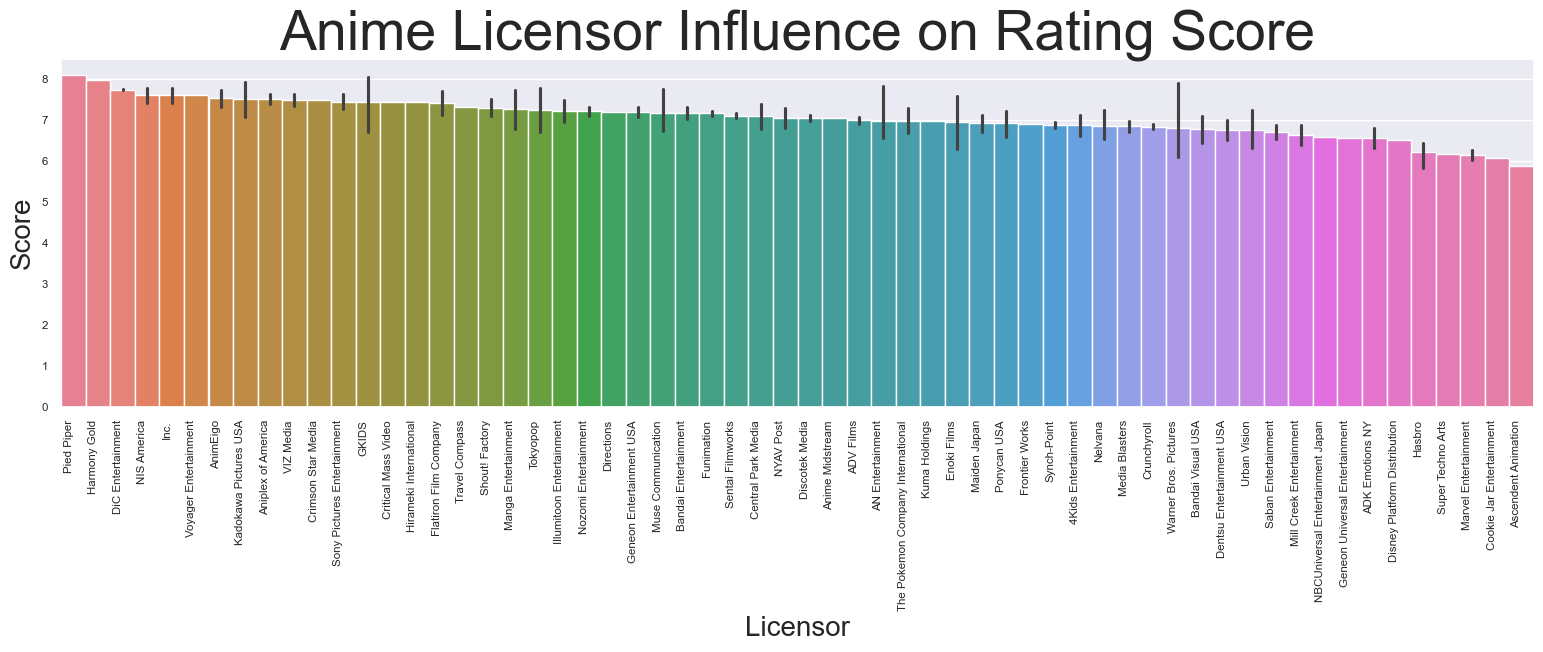

In [137]:
#Get main licensors and sort by mean
dfSingleLicensors = separateLicensors(main_df.fillna(''))
grouped = dfSingleLicensors.groupby(['single_licensor'])
grouped_df = pd.DataFrame({col:vals['Score'] for col, vals in grouped})
means = grouped_df.mean()
means.sort_values(ascending = False, inplace = True)
sorted_df = grouped_df[means.index]

#Graph
sns.set_theme(rc={'figure.figsize':(19, 6)}, font_scale = 0.75)
plt.xticks(rotation=90, ha='right')
plt.subplots_adjust(bottom=0.3)
plt.xlabel('Licensor', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
ax = sns.barplot(data = sorted_df, width = 1).set_title('Anime Licensor Influence on Rating Score', fontsize = 40)

In [7]:
def separateGenres(df :pd.DataFrame):
    returnList = []
    for row in df.itertuples(index=False):
        genres = row.Genres.split(',')
        for genre in genres:
            row_list = list(row)
            row_list.append(genre.strip())
            returnList.extend([row_list])
    
    return pd.DataFrame(returnList, columns=['anime_id','Name','Score','Genres','Episodes','Studios','Licensors','Source', 'main_genre'])

Text(0.5, 1.0, 'Anime Genre Influence on Rating Score')

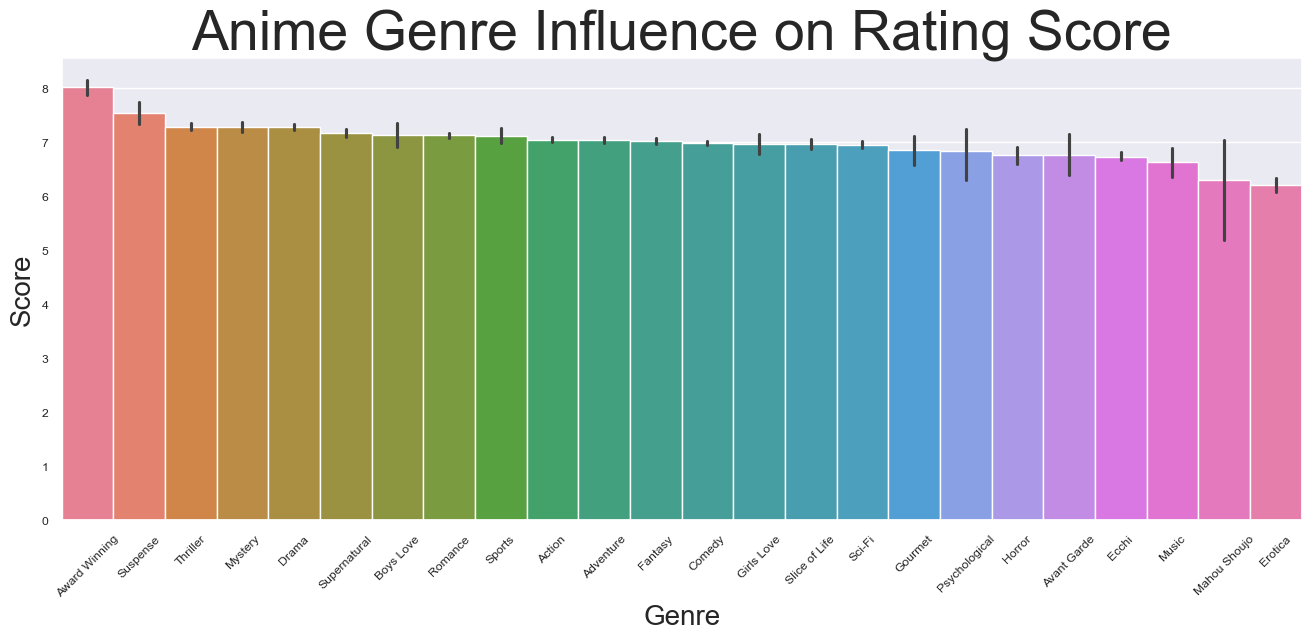

In [122]:
dfSeparateGenres = separateGenres(main_df)
grouped = dfSeparateGenres.groupby(['main_genre'])
grouped_df = pd.DataFrame({col:vals['Score'] for col, vals in grouped})
means = grouped_df.mean()
means.sort_values(ascending = False, inplace = True)
sorted_df = grouped_df[means.index]

sns.set_theme(rc={'figure.figsize':(16, 6)}, font_scale = 0.8)
plt.xticks(rotation=45)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
sns.barplot(data = sorted_df, width = 1).set_title('Anime Genre Influence on Rating Score', fontsize = 40)

In [13]:
dfSeparateGenres.groupby('main_genre').count()

,anime_id,Name,Score,Genres,Episodes,Studios,Licensors,Source
main_genre,,,,,,,,
Action,1164,1164,1164,1164,1164,1164,1164,1164
Adventure,647,647,647,647,647,647,647,647
Avant Garde,17,17,17,17,17,17,17,17
Award Winning,48,48,48,48,48,48,48,48
Boys Love,25,25,25,25,25,25,25,25
Comedy,1270,1270,1270,1270,1270,1270,1270,1270
Drama,645,645,645,645,645,645,645,645
Ecchi,259,259,259,259,259,259,259,259
Erotica,2,2,2,2,2,2,2,2


this plot shows us the scores of animes aggregated by their genres. Due to splitting the genres into their own entries, the more popular genres (action, comedy, fantasy, etc.) obviously had more entries into this visualization compared to the less popular ones with less than 10 entries. Although the genres with less than 10 entries have significantly less representation in our dataset, most of them had a mean of around 7, which is around average for animes coming out today, meaning even the more obscure genres have potential to be at least passable. In addition, with this visualization, we have found some genres that could do with some more representation in today's anime sphere......maybe not erotica though, for obvious reasons.

Text(0.5, 1.0, 'Anime Episode Number Influence on Rating Score')

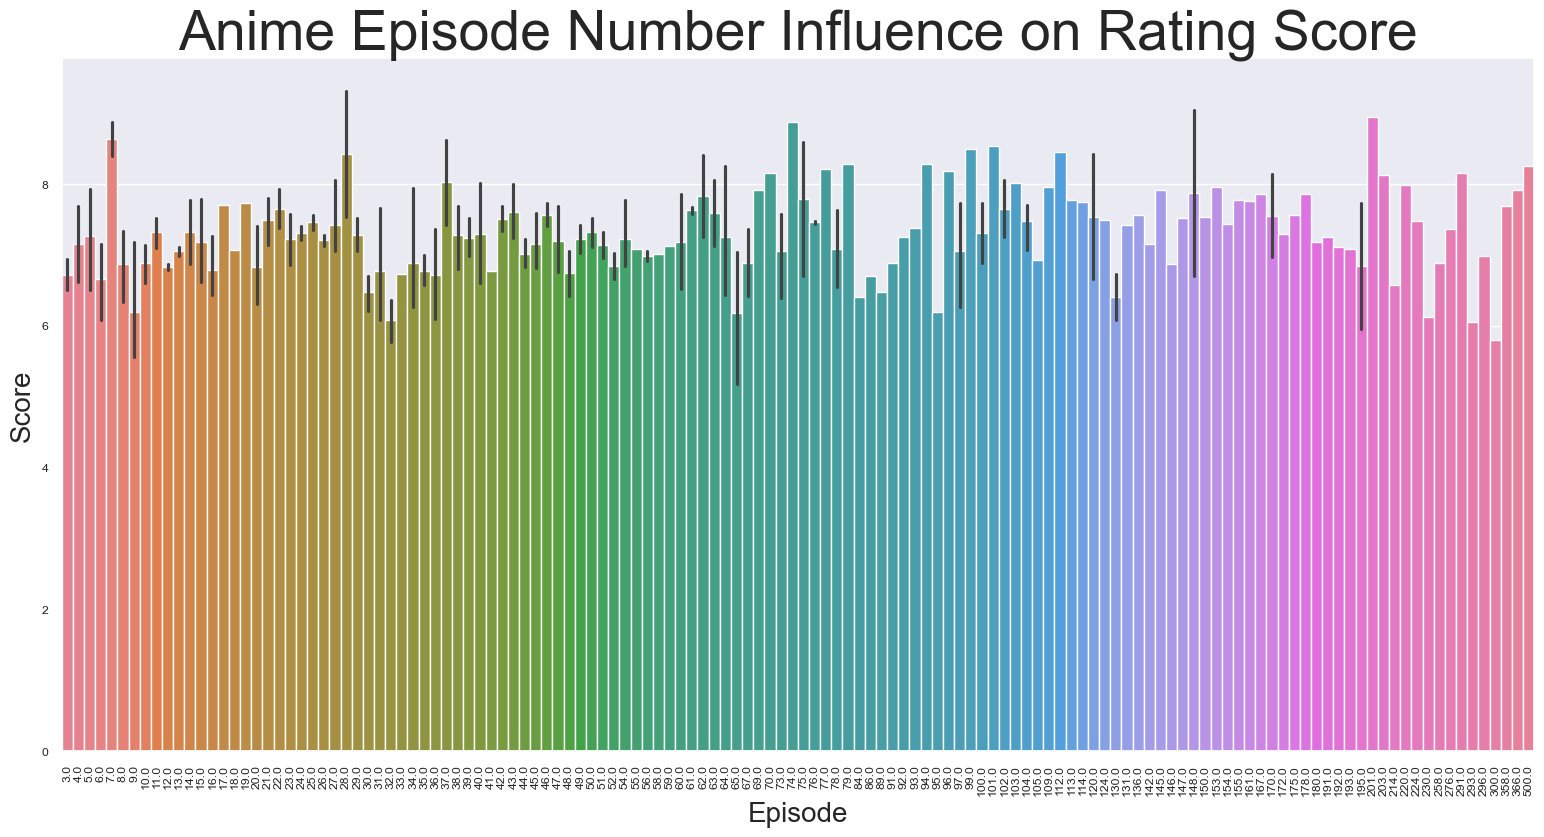

In [134]:
#Group for Episodes predictor
grouped = main_df.groupby(['Episodes'])
grouped_df = pd.DataFrame({col:vals['Score'] for col, vals in grouped})

#Create and customize boxplot
sns.set_theme(rc={'figure.figsize':(19, 9)}, font_scale = 0.8)
plt.xticks(rotation=90)
plt.xlabel('Episode', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
sns.barplot(data = grouped_df, width = 1).set_title('Anime Episode Number Influence on Rating Score', fontsize = 40)

### Prediction

Finally, let's model our dataset using linear regression to try and see if it is possible to predict the score of an anime

In [8]:
import statsmodels.formula.api as smf

model = smf.ols(formula='Score ~ C(Genres) + Episodes + C(Studios) + C(Licensors) + C(Source)', data=main_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     3.613
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          4.90e-135
Time:                        11:53:34   Log-Likelihood:                -1842.8
No. Observations:                3032   AIC:                             5962.
Df Residuals:                    1894   BIC:                         1.281e+04
Df Model:                        1137                                         
Covariance Type:            nonrobust                                         
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

Looking at the p-values for this linear regression model, a vast majority of the categories have a p-value above 0.05, meaning the assigned coefficient could be attributed to random chance and not a good variable to be used for predicting score. In addition, the model tells us that there might be strong multicolinearity between the features, so we will use a variance inflation factor function to check for multicolinearity

In [5]:
##VIF/MULTICOLLINEARITY CALCULATION
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create dummies and have independent variables in one dataframe
df_dummies = pd.get_dummies(main_df[['Genres', 'Episodes', 'Studios', 'Licensors', 'Source']], 
                            columns=['Genres', 'Episodes', 'Studios', 'Licensors', 'Source'], 
                            dtype = float, drop_first = True)

#Create vif dataframe and calculate
vif_df = pd.DataFrame()
vif_df['features'] = df_dummies.columns

vif_df['VIF'] =  [variance_inflation_factor(df_dummies.values, i)
                          for i in range(len(df_dummies.columns))]
vif_df


c:\Users\tonyb\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,"Genres_Action, Adventure",2.421484
1,"Genres_Action, Adventure, Award Winning, Comed...",1.841832
2,"Genres_Action, Adventure, Award Winning, Drama...",1.815949
3,"Genres_Action, Adventure, Award Winning, Drama...",1.147945
4,"Genres_Action, Adventure, Award Winning, Drama...",inf
...,...,...
1314,Source_Picture book,1.325014
1315,Source_Radio,1.418244
1316,Source_Unknown,3.614044
1317,Source_Visual novel,4.392300


If the VIF of a feature is above a 5, it indicates that there is some correlation. If the VIF of a feature is infinite, it indicates perfect correlation, so we will filter VIF for VIF score above a 5 or VIF equal to 'inf'

In [15]:
vif_df[(vif_df.get('VIF') > 5) | (vif_df.get('VIF') == 'inf')]

,features,VIF
4,"Genres_Action, Adventure, Award Winning, Drama...",inf
5,"Genres_Action, Adventure, Award Winning, Sci-Fi",inf
9,"Genres_Action, Adventure, Comedy, Drama, Horro...",inf
16,"Genres_Action, Adventure, Comedy, Fantasy, Gou...",inf
24,"Genres_Action, Adventure, Comedy, Romance",inf
63,"Genres_Action, Avant Garde, Award Winning, Dra...",inf
66,"Genres_Action, Award Winning, Drama, Romance, ...",inf
92,"Genres_Action, Comedy, Fantasy, Supernatural",inf
96,"Genres_Action, Comedy, Horror, Mystery, Supern...",inf
98,"Genres_Action, Comedy, Horror, Supernatural, S...",inf


Let's go through these variables with high multicolinearity feature by feature
- Genres - all of the genres with a VIF of 'inf' correlates with a single anime in the dataset, so it makes sense that it would have strong multicolinearity with other features since there's only one entry to go off of. For the 3 genres with a VIF above 5, they have multiple animes with the same genre except Adventure, Drama, Fantasy, Romance where it only has one entry
- Episodes - all the episode counts with a VIF of 'inf' again only correlate with a single anime. For the 3 episode counts with the 3 highest VIFs, 12, 13, and 26, it makes sense that these have a high VIF value because 90% of the animes being produced have either 12 episodes or 24/26 episodes, which forces a strong multicolinearity with other features
- Studios - again, the studios variables with a VIF of 'inf' correlates with only 1 anime. For the studios that have a VIF above 5, they have many animes with episode counts of around either 12 or 24, which matches up with the previous bullet point, but they also have many repeating licensors
- Licensors - the licensors that have a VIF above 5 are the streaming platforms that people use the most, with Crunchyroll being the most popular and the one with the highest VIF. It makes sense that the licensors with a VIF above 5 are correlated with other features because of their popularity
- Source - the source material for the majority of the animes produced are either adapted from manga, light novel, or are original works, so the source feature will invariably be correlated with the other features. In addition, the 4 sources that have the highest amounts in this dataset are manga (1124 animes), original (637 animes), light novel (423 animes), and game (195 animes)

# Ethics & Privacy

We got our data from Kaggle, which ranks the animes off of MyAnimeList.com. There is privacy between the data because we are going through the anonymous opinions of viewers on show popularity. However, there is potential bias because the genres of anime can depend on the viewer.
For instance, if the most common shows are shonen, then there could be higher-rated animes on MyAnimeList that belong to different genres, hence underrepresenting other types of anime.
One way to detect these biases throughout the project is by making sure the data we collect isn’t invasive to any personal information of anybody.
One problem that can affect our data analysis is that the ratings might be skewed towards popular genres, which impacts the fairness of rankings. To handle this issue, we can analyze the distribution of genres in the dataset to check for any disproportion.
1. We should Calculate the distribution of anime genres in the dataset. We can do this by visualizing the distribution through bar charts, and compare the genres.
2. Rate the analysis by Genre. Segment the data by genre, and compute the average ratings for each. By doingso, we can identify any genres with significantly higher or lower ratings, which could be overrepresented.
3. Check if there is a correlation between popularity and ratings. This can be done by examining the relationship between the two, and checking if highly popular anime genres have higher ratings.
4. Ensure the sample of anime included in the dataset is representative of the full range of genres. If certain genres are underrepresented, consider stratified sampling methods to balance the dataset.
5. Check for Bias through statistical testing to check for significant differences in ratings across genres.
6. Mitigate any Bias through weighing ratings by genre representation to balance their impact. Alternatively, we could separate rankings for each genre to avoid cross-genre comparison bias.
7. Clearly document any biases detected and the steps taken to address them. Ensure transparency by explaining how the data was sourced and any limitations it might have.

# Discusison and Conclusion

For this project we wanted to see if we can predict an anime's score on a scale of 1-10 before it has come out by knowing its genres, how many episodes it will have, the studio(s) producing it, the platform it will be streamed on, and the source material it is adapted from. We hypothesized that the more popular genres, studios, and licensing platforms will be strongly positively correlated with higher scores, the episode count will be positively correlated with higher scores, and source material will have no correlation with higher scores. Here, by popularity, we mean that people are talking about them more through forms of communication like social media platforms. We think the more popular genres, studios, and licensing platforms will be scored higher because inevitably more people will like them and be biased towards scoring them higher. In addition, we also want to find genres that are less represented in the anime sphere today so it can also get its spotlight.

There have been previous works done that are similar to what we are trying to do, most notably Metis Project 2, where the author tried to predict the anime rating scores on MyAnimeList, a website that contains information for nearly all animes ever released and allows users of the platform to score them. The author used similar features to what we are trying, namely an anime's source and its studio. In the end the author concluded that if an anime is produced by a studio called Production I.G. and its source material is manga (similar to a comic book but in black and white) the anime will likely have a good score. What we are trying to do is incorporate more features so that we can have a more comprehensive prediction model.

In our analysis we found that the source materials that get adapted more (mangas, light novels, novels, etc.) have a higher average, meaning our hypothesis that an anime's source material have no effect on an anime's score is likely wrong; more popular anime studios (e.g. Bones, MAPPA, Production I.G. mentioned earlier, etc.) do produce anime that are much better in quality as to have a mean score of above 8.5, but there are some studios that have mean scores of above 8.5 that none of us have ever heard of, suggesting that popular studios are more correlated with higher scores, but it's not impossible for new/less popular studios to produce a great quality anime; the most popular anime streaming platform today, Crunchyroll, is nowhere near the highest when compared to other licensors based on mean score, meaning our hypothesis that popular licensing platforms will have higher scoring animes is very likely incorrect; and all the genres when graphed with respect to mean score are generally around today's average anime score of 7, meaning a genre's popularity likely doesn't mean animes of that genre will be scored higher. In addition, we have found genres that are way less represented (Erotica, Mahou Shoujo or Magical Girl, Psychological, and Thriller) and could be represented more......again probably not Erotica, due to obvious reason and the fact that it had a below average mean score.

Finally, when we tried to model our data using linear regression, we got a model that had glaring issues: many of the variables in our features had p-values way above the usual significance of 0.05 and the model suggested strong multicolinearity between variables. After running a variance inflation factor function that checks for multicolinearity, one third of the variables had a VIF or either above 5 or 'inf', meaning there are strong multicolinearity. The p-values above 0.05 and VIFs above 5 forces us into the conclusion that with a simple linear regression model is not enough to predict an anime's score. If we want to try something similar in the future we will have to use more sophisticated methods of prediction.

A finall word, even if we were able to get a model that is statistically significant, due to how the data are stored in our dataset, especially the genres column, there is still one glaring issue. If we have an anime that we want to predict its score but it's being produced by a studio that is completely new and/or have a combination of genres that doesn't exist in our dataset we simply won't be able to predict. The problem could be solved if we split each singular genre/studio into its own entry but it would overinflate the dataset and place more emphasis on the genres/studio that already have a lot of representation. This means if we want to try prediction again in the future we will also have to deal with this issue.


# Team Contributions

Tony Bai
- wrote research question, hypothesis, abstract, and conclusion
- coded data wrangling, VIF, and some EDA

Ryan Regala

Jiwon Kim

Colin Isidro

Rambharath Saravanan